<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Regressao_Linear_Multipla_com_sklearn_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.formula.api as smf

In [12]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# le.fit(df.CarName)
# df.CarName = le.transform(df.CarName)
# le.fit(df.fueltype)
# df.fueltype = le.transform(df.fueltype)
# le.fit(df.aspiration)
# df.aspiration = le.transform(df.aspiration)
# le.fit(df.doornumber)
# df.doornumber = le.transform(df.doornumber)
# le.fit(df.carbody)
# df.carbody = le.transform(df.carbody)
# le.fit(df.drivewheel)
# df.drivewheel = le.transform(df.drivewheel)
# le.fit(df.enginelocation)
# df.enginelocation = le.transform(df.enginelocation)
# le.fit(df.enginetype)
# df.enginetype = le.transform(df.enginetype)
# le.fit(df.cylindernumber)
# df.cylindernumber = le.transform(df.cylindernumber)

<Axes: xlabel='price', ylabel='Count'>

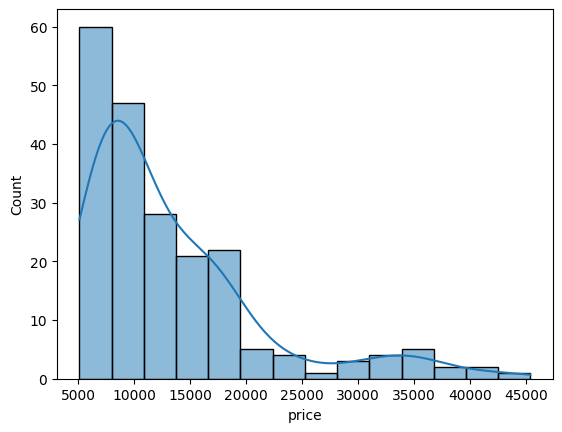

In [14]:
sns.histplot(df, x='price', kde=True)

<Axes: xlabel='doornumber', ylabel='Count'>

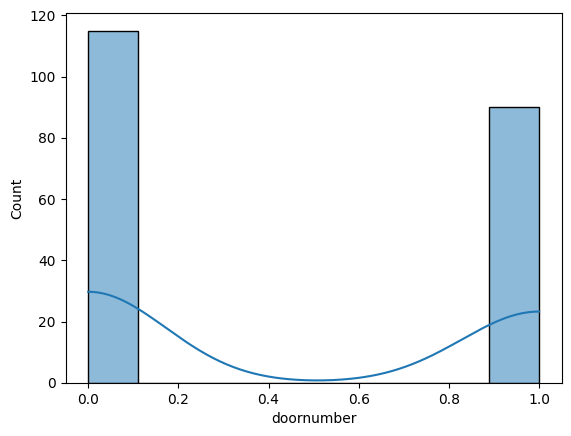

In [15]:
sns.histplot(df, x='doornumber', kde=True)

In [16]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [32]:
function = 'price~carwidth+enginesize+stroke+compressionratio+horsepower+peakrpm+citympg'

In [33]:
model = smf.ols(formula=function, data=df_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     153.2
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.89e-76
Time:                        12:23:24   Log-Likelihood:                 232.27
No. Observations:                 205   AIC:                            -448.5
Df Residuals:                     197   BIC:                            -422.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0795      0.047  

In [35]:
x = df_scaled[['carwidth', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]
y = df_scaled['price']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred_train = LR.predict(x_train)
print('MAE: ' , metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE: ' , metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE:  0.05458440424475504
MSE:  0.00542774771446959
RMSE:  0.07367324965324654


In [38]:
y_pred_test = LR.predict(x_test)
print('MAE: ' , metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ' , metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE:  0.06966523067882165
MSE:  0.009236311671369842
RMSE:  0.09610573173005782
